In [1]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\VIJAY KUMAR
[nltk_data]     JHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd

In [3]:
data = pd.read_excel("root2ai.xlsx")

In [4]:
x = data["Text"]
y = data["Target"]

In [5]:
 nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\VIJAY KUMAR
[nltk_data]     JHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:

documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(x)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(x[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
x = vectorizer.fit_transform(documents).toarray()

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
x = tfidfconverter.fit_transform(x).toarray()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [14]:

# Predict for multiple observations
clf.predict(X_test[0:10])

array(['FinTech', 'FinTech', 'FinTech', 'credit reporting', 'FinTech',
       'FinTech', 'FinTech', 'FinTech', 'FinTech', 'FinTech'],
      dtype=object)

In [15]:
# The score method returns the accuracy of the model
score = clf.score(X_test, y_test)
print(score)

0.4170887469720326


In [16]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

In [18]:
accuracy

[0.40079277692138293,
 0.4170887469720326,
 0.43206342215371063,
 0.4494604712618366,
 0.4584893195331425]

In [19]:
max_depth_range

[1, 2, 3, 4, 5]

In [20]:
import matplotlib.pyplot as plt

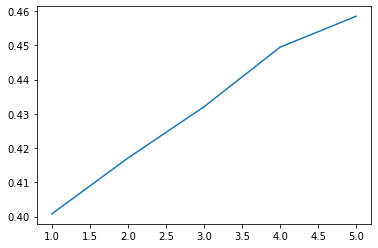

In [22]:
plt.plot(max_depth_range, accuracy)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 152    0    3    0  281    0    0    7    0    0    8]
 [  16    0    5    0  263    0    0    0    0    0    2]
 [  50    0   91    0  394    0    0    0    0    0    6]
 [  12    0   11    0   32    0    1    0    0    0    2]
 [  82    0   12    0 1582    0    1    0    0    0   34]
 [  15    0    3    0  178    0    0    0    0    0    0]
 [   7    0    3    0  196    0    0    0    0    0    5]
 [  32    0   10    0  304    0    0   96    0    0    0]
 [   3    0    1    0  133    0    0    0    0    0    1]
 [   9    0    0    0  166    0    0    0    0    0    0]
 [  42    0    2    0  127    0    0    0    0    0  161]]


C:\Users\VIJAY KUMAR JHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

         Bigdata       0.36      0.34      0.35       451
      Blockchain       0.00      0.00      0.00       286
  Cyber Security       0.65      0.17      0.27       541
   Data Security       0.00      0.00      0.00        58
         FinTech       0.43      0.92      0.59      1711
   Microservices       0.00      0.00      0.00       196
        Neobanks       0.00      0.00      0.00       211
        Reg Tech       0.93      0.22      0.35       442
   Robo Advising       0.00      0.00      0.00       138
   Stock Trading       0.00      0.00      0.00       175
credit reporting       0.74      0.48      0.58       332

        accuracy                           0.46      4541
       macro avg       0.28      0.19      0.19      4541
    weighted avg       0.42      0.46      0.37      4541



### A decision tree has been used in this dataset to classify the text data on a trial basis. It can be seen here the model has very little accuracy so we should use other classification algorithms like RandomForestClassifier